# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [332]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as Soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [333]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.58M/6.58M [00:00<00:00, 52.4MB/s]


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [334]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [10]:
# Create a Beautiful Soup Object
html = browser.html
soup = Soup(html, 'html.parser')

In [337]:
# Extract all rows of data
table = soup.find('table', class_='table')
rows = table.find_all('tr', class_='data-row')
rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [366]:
# Create an empty list
Mars_Temperature_Data = []
# Loop through the scraped data to create a list of rows
for row in rows:
    id_ = row.find_all('td')[0].text
    terrestrial_date = row.find_all('td')[1].text
    sol = row.find_all('td')[2].text
    ls = row.find_all('td')[3].text
    month = row.find_all('td')[4].text
    min_temp = row.find_all('td')[5].text
    pressure = row.find_all('td')[6].text
    
    summary_dict = {
        "id" : id_,
        "terrestrial_date" : terrestrial_date,
        'sol' : sol,
        'ls' : ls,
        'month' : month,
        'min_temp' : min_temp,
        'pressure' : pressure,
    }
    Mars_Temperature_Data.append(summary_dict)

In [359]:
Mars_Temperature_Data

[{'id': '2',
  'terrestrial_date': '2',
  'sol': '2',
  'ls': '2',
  'month': '2',
  'min_temp': '2',
  'pressure': '2'},
 {'id': '13',
  'terrestrial_date': '13',
  'sol': '13',
  'ls': '13',
  'month': '13',
  'min_temp': '13',
  'pressure': '13'},
 {'id': '24',
  'terrestrial_date': '24',
  'sol': '24',
  'ls': '24',
  'month': '24',
  'min_temp': '24',
  'pressure': '24'},
 {'id': '35',
  'terrestrial_date': '35',
  'sol': '35',
  'ls': '35',
  'month': '35',
  'min_temp': '35',
  'pressure': '35'},
 {'id': '46',
  'terrestrial_date': '46',
  'sol': '46',
  'ls': '46',
  'month': '46',
  'min_temp': '46',
  'pressure': '46'},
 {'id': '57',
  'terrestrial_date': '57',
  'sol': '57',
  'ls': '57',
  'month': '57',
  'min_temp': '57',
  'pressure': '57'},
 {'id': '68',
  'terrestrial_date': '68',
  'sol': '68',
  'ls': '68',
  'month': '68',
  'min_temp': '68',
  'pressure': '68'},
 {'id': '79',
  'terrestrial_date': '79',
  'sol': '79',
  'ls': '79',
  'month': '79',
  'min_temp': '7

In [368]:
#Use this code to see what is in each column [x:x]
for value in rows:
    row_data = value.find_all('td')[2].text
    print(row_data)

10
11
12
13
14
15
16
17
21
22
23
24
25
26
27
28
29
30
31
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
196
197
198
199
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
31

In [369]:
#pandas dataframe:
import pandas
df = pd.DataFrame(Mars_Temperature_Data)
df.head(20)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


In [371]:
Mars_Temp_Data_df = df
Mars_Temp_Data_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [207]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
import pandas as pd
#use_df = pd.read_html(url)
#use_df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [209]:
# Confirm DataFrame was created successfully
#Mars_Temp_Data_df = use_df[0]
#Mars_Temp_Data_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [372]:
# Examine data type of each column
Mars_Temp_Data_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [379]:
# Change data types for data analysis
Mars_Temp_Data_df['terrestrial_date'] = pd.to_datetime(Mars_Temp_Data_df['terrestrial_date'])

In [377]:
Mars_Temp_Data_df['id'] = Mars_Temp_Data_df['id'].astype('int64')
Mars_Temp_Data_df['sol'] = Mars_Temp_Data_df['sol'].astype('int64')
Mars_Temp_Data_df['ls'] = Mars_Temp_Data_df['ls'].astype('int64')
Mars_Temp_Data_df['month'] = Mars_Temp_Data_df['month'].astype('int64')
Mars_Temp_Data_df['min_temp'] = Mars_Temp_Data_df['min_temp'].astype('float64')
Mars_Temp_Data_df['pressure'] = Mars_Temp_Data_df['pressure'].astype('float64')
Mars_Temp_Data_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [380]:
# Confirm type changes were successful by examining data types again
Mars_Temp_Data_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [381]:
# 1. How many months are there on Mars?
Mars_Temp_Data_df['month'].max()

12

In [383]:
# 2. How many Martian days' worth of data are there?
Mars_Temp_Data_df['id'].count()

1867

In [384]:
# 3. What is the average low temperature by month?
avg_temp = Mars_Temp_Data_df.groupby('month')['min_temp'].mean()
avg_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0, 0.5, 'Avg Min-Temp')

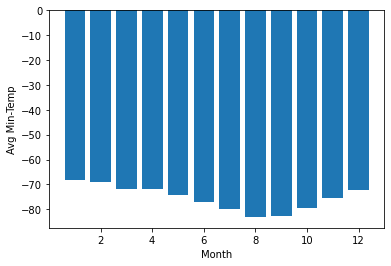

In [251]:
# Plot the average temperature by month
import matplotlib.pyplot as plt

y_axis = avg_temp
x_axis = Mars_Temp_Data_df['month'].unique()

plt.bar(x_axis, y_axis)
#plt.gca().invert_xaxis()
plt.xlabel("Month")
plt.ylabel('Avg Min-Temp')

In [356]:
# Identify the coldest and hottest months in Curiosity's location
#import matplotlib.pyplot as plt

#y_axis = avg_temp.sort_values(ascending=False)
#x_axis = Mars_Temp_Data_df['month'].unique()

#plt.bar(x_axis, y_axis)
#plt.gca().invert_xaxis()
#plt.xlabel("Month")
#plt.ylabel('Avg Min-Temp')

<AxesSubplot:xlabel='month'>

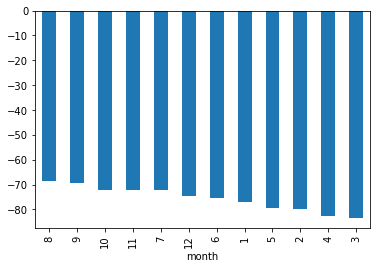

In [355]:
# Identify the coldest and hottest months in Curiosity's location
avg_temp.sort_values(ascending=False).plot(kind="bar")

In [357]:
# Identify the coldest and hottest months in Curiosity's location
avg_temp.sort_values(ascending=False)

month
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
7    -72.281690
12   -74.451807
6    -75.299320
1    -77.160920
5    -79.308725
2    -79.932584
4    -82.747423
3    -83.307292
Name: min_temp, dtype: float64

In [242]:
# 4. Average pressure by Martian month
avg_pressure = Mars_Temp_Data_df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0, 0.5, 'Avg Min-Temp')

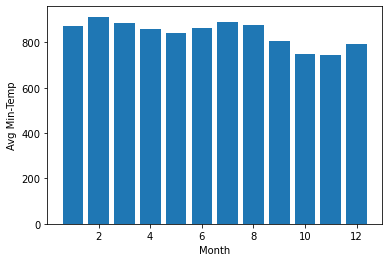

In [262]:
# Plot the average pressure by month
y_axis = avg_pressure
x_axis = Mars_Temp_Data_df['month'].unique()
sorted_press = 

plt.bar(x_axis, y_axis)
#plt.gca().invert_xaxis()
plt.xlabel("Month")
plt.ylabel('Avg Min-Temp')

In [273]:
earth_days_per_month = Mars_Temp_Data_df.groupby('month')['terrestrial_date'].count()
earth_days_per_month

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: terrestrial_date, dtype: int64

In [388]:
# 5. How many terrestrial (earth) days are there in a Martian year?
total_earth_days_per_year = earth_days_per_month.sum()
total_earth_days_per_year

1867

Text(0, 0.5, 'Min Temperature')

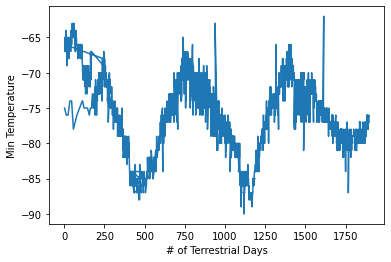

In [389]:
# 5. How many terrestrial (earth) days are there in a Martian year?
x_axis = Mars_Temp_Data_df['id']
y_axis = Mars_Temp_Data_df['min_temp']

plt.plot(x_axis, y_axis)
plt.xlabel('# of Terrestrial Days')
plt.ylabel('Min Temperature')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [391]:
# Write the data to a CSV
Mars_Temp_Data_df.to_csv("Mars_Temp_Data.csv", index=False)

In [33]:
browser.quit()